# Speed up color change

This notebook shows how to speed up changing a color in an image. 

In [1]:
# The first step you must do in order to work with Cython in the notebook is to use the extension loader
%load_ext cython

In [2]:
# Import the numpy library
import numpy as np

def load_image_data(name):
    from scipy import misc
    return misc.imread(name)

data = load_image_data('pepper-small.jpeg')

## Show the image!

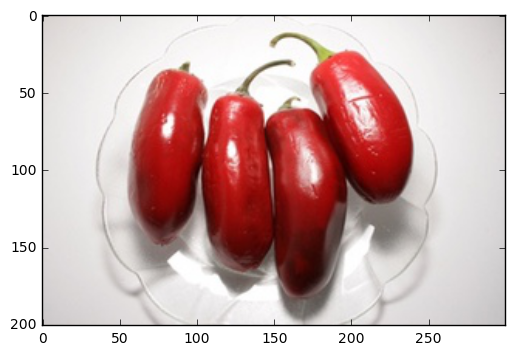

In [3]:
# Another benefit of working in the Notebook is that images can be displayed inline
%matplotlib inline
from matplotlib.pyplot import imshow, figure

imshow(data)

## It's quite a small picture

In [4]:
print(type(data))
print(data.dtype)
print(data.shape)

<class 'numpy.ndarray'>
uint8
(201, 300, 3)


## Let's swap the red channel with the blue channel

This is the pure python version:

In [5]:
def red_to_blue_python(data):
    """ Transformation function in plain Python.
    We allocate memory for a new image.  The algorithm has 
    two nested loops, one for moving over the width, and 
    another for moving over the height.
    """
    result = np.zeros_like(data)
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            r = data[i, j, 0]
            g = data[i, j, 1]
            b = data[i, j, 2]
            result[i, j, 0] = b
            result[i, j, 1] = g
            result[i, j, 2] = r
    return result

## Change the color

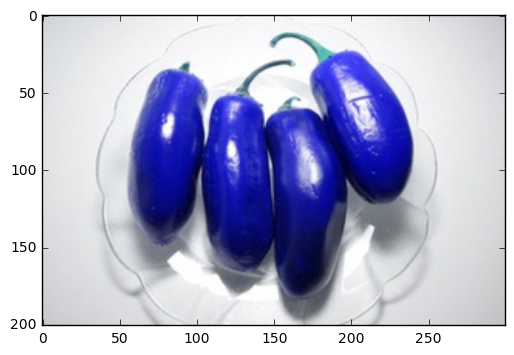

In [6]:
bluedata = red_to_blue_python(data)
imshow(bluedata)

## Convert the code to Cython!

In [9]:
%%cython -a  
# We have used the Cython cell magic at the top.  This means the entire cell will be compiled with cythonize.
# We have also enabled annotation with the "-a" option.

# Since this cell is going to be compiled in a separate way, it can't refer to anything else in the notebook
import numpy as np  # For allocating memory
ctypedef unsigned char byte  # Convenience

cpdef byte[:,:,:] red_to_blue_cython(byte[:,:,:] data):
    cdef byte[:, :, :] result = np.zeros_like(data)
    cdef int i,  # Loop variables
    cdef byte r, g, b  # color components
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            r = data[i, j, 0]
            g = data[i, j, 1]
            b = data[i, j, 2]
            result[i,j,0] = b
            result[i,j,1] = g
            result[i,j,2] = r
    return result

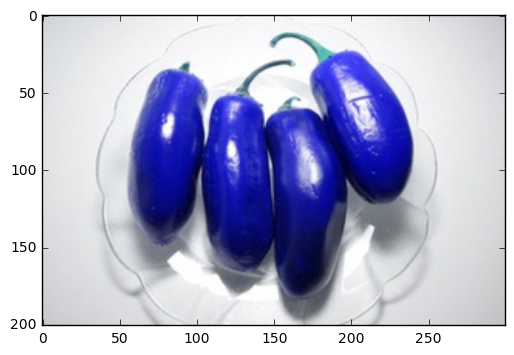

In [8]:

bluedata_cy = red_to_blue_cython(data)
imshow(bluedata_cy)

# Performance

In [10]:
data = load_image_data('pepper-small.jpeg')
%timeit result = red_to_blue_python(data)
%timeit result = red_to_blue_cython(data)

10 loops, best of 3: 50.6 ms per loop
10000 loops, best of 3: 118 µs per loop


# What about a much bigger picture?

(2592, 3888, 3)


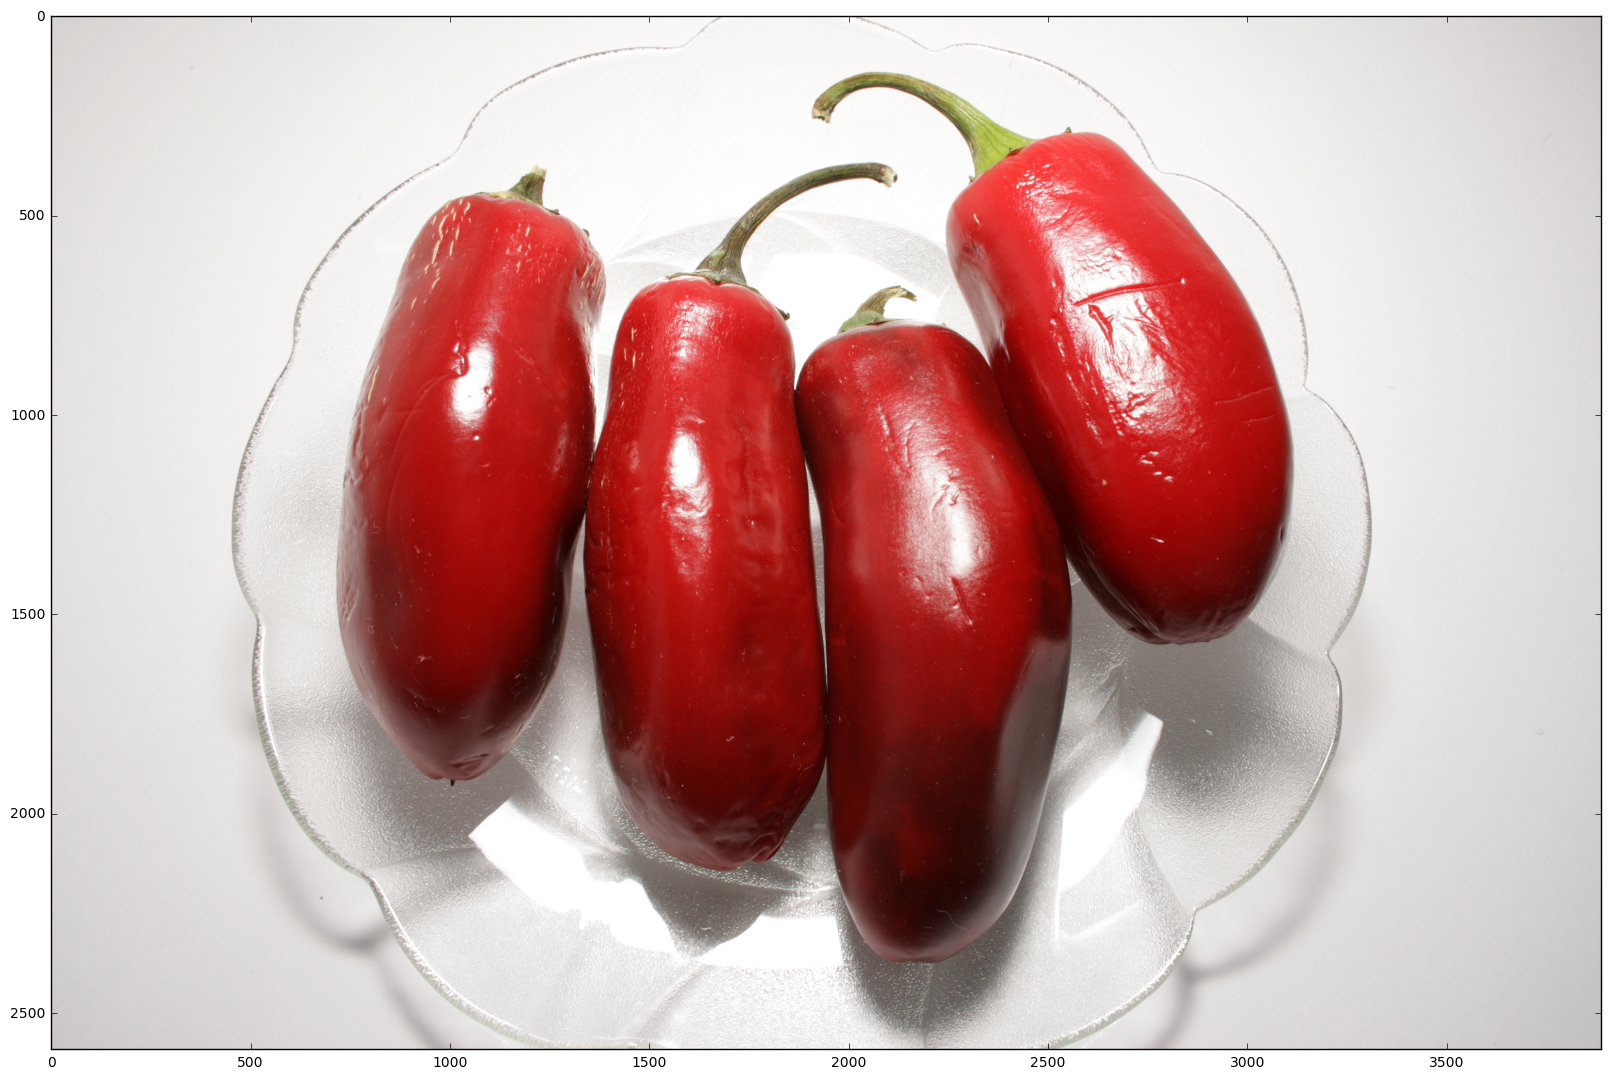

In [11]:
data_big = load_image_data('pepper.jpg')
figure(figsize=(20,20))  # These are "inches"
print(data_big.shape)
imshow(data_big)

## Big picture performance

In [12]:
%timeit result = red_to_blue_python(data_big)
%timeit result = red_to_blue_cython(data_big)

1 loop, best of 3: 8.14 s per loop
10 loops, best of 3: 25.3 ms per loop


# Enjoy the big blue chillis!

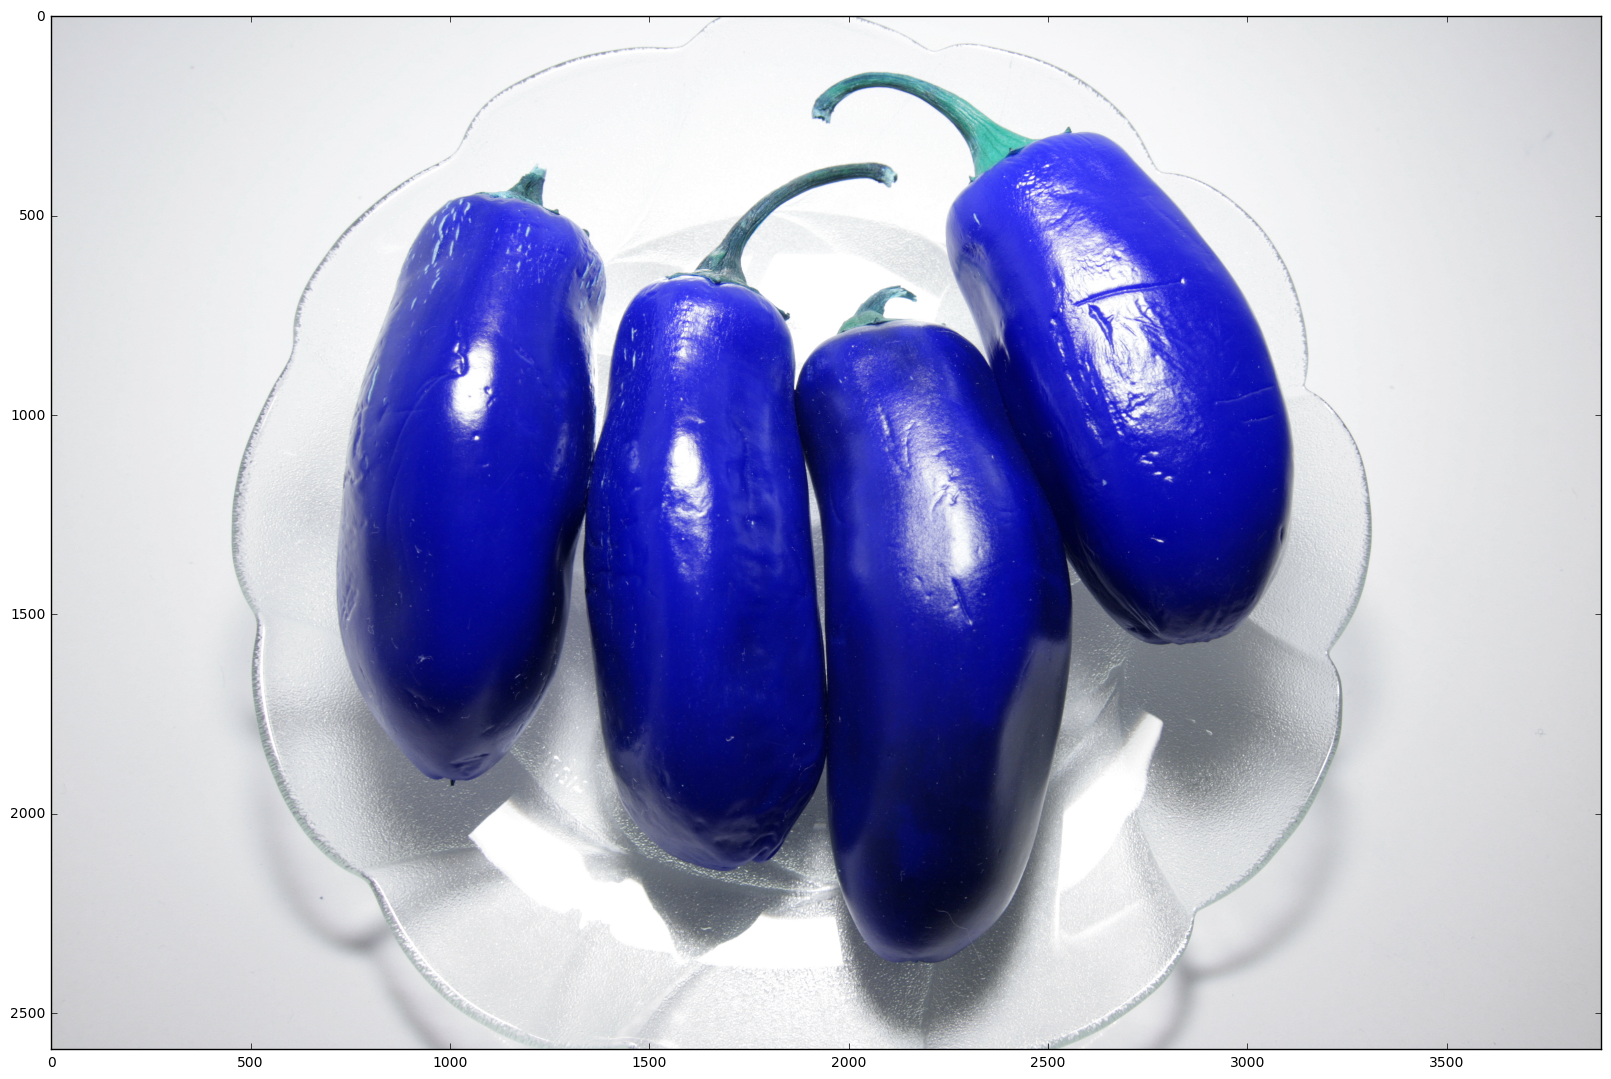

In [13]:
figure(figsize=(20,20))  # These are "inches"
imshow(red_to_blue_cython(data_big))